In [ ]:
!pip install pandas seaborn statsmodels 

# Visualisations for numeric data

In [126]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [129]:
tips = sns.load_dataset("tips")

In [130]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## pairplot

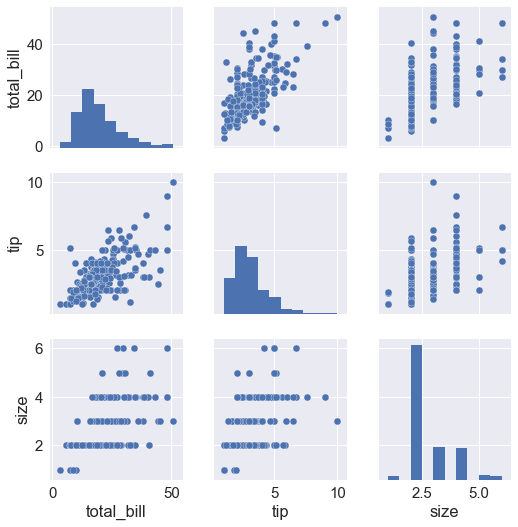

In [137]:
sns.pairplot(tips)

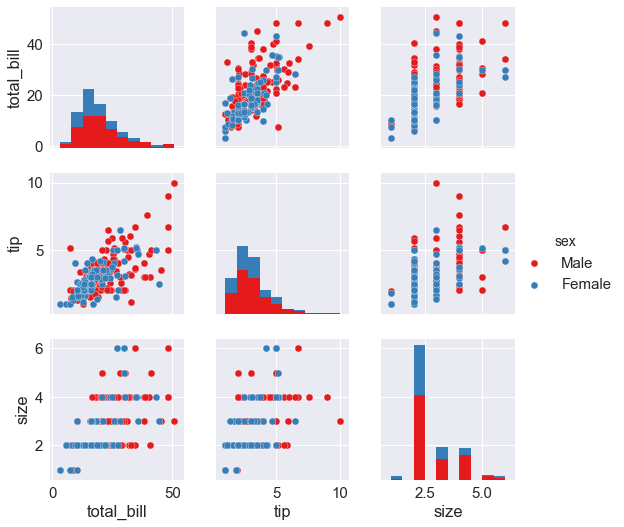

In [139]:
sns.pairplot(tips, hue='sex', palette='Set1')

## distplot

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


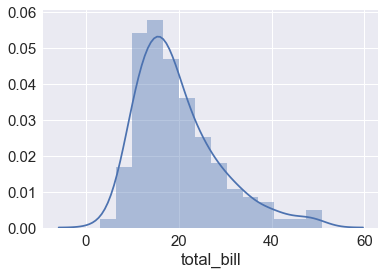

In [132]:
sns.distplot(tips['total_bill'])

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


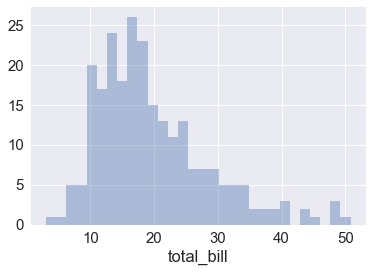

In [133]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

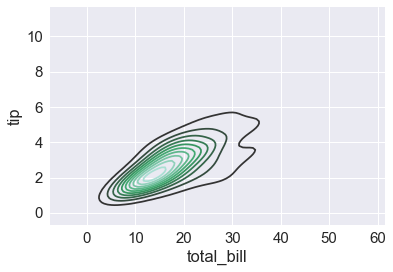

In [142]:
sns.kdeplot(tips['total_bill'], tips['tip'])

## rugplot

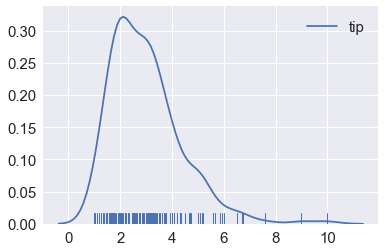

In [143]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## jointplot

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


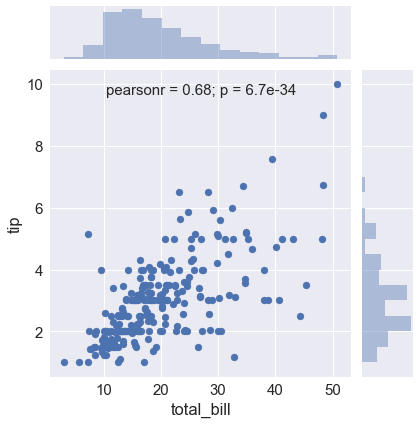

In [134]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


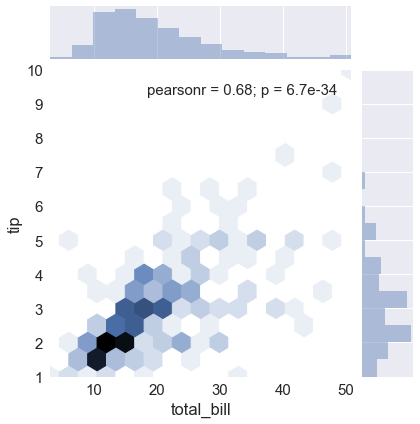

In [135]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


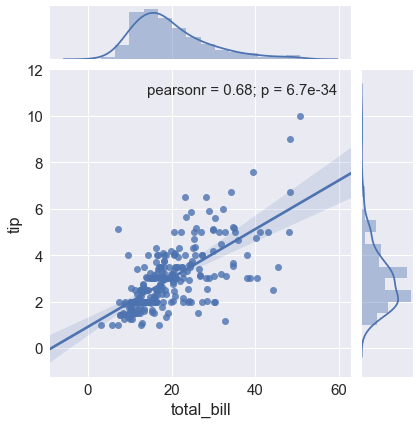

In [136]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

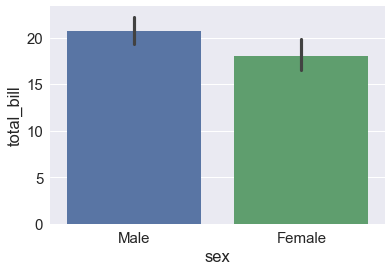

In [145]:
sns.barplot(x='sex', y='total_bill', data=tips)

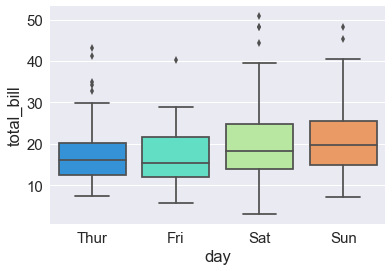

In [146]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')

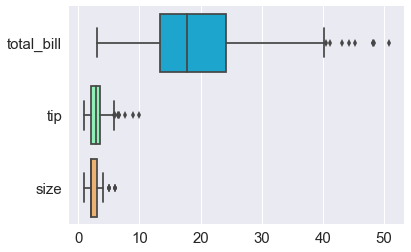

In [147]:
sns.boxplot(data=tips, palette='rainbow', orient='h')

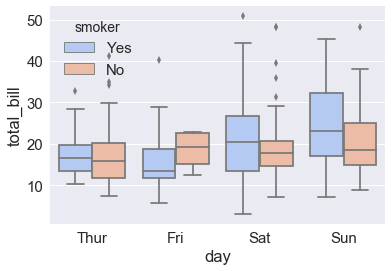

In [148]:
sns.boxplot(
    x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")

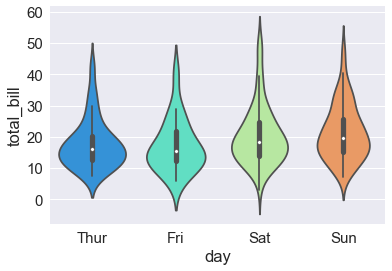

In [149]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')

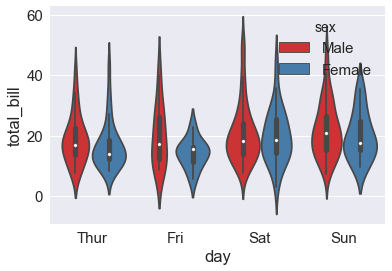

In [150]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')

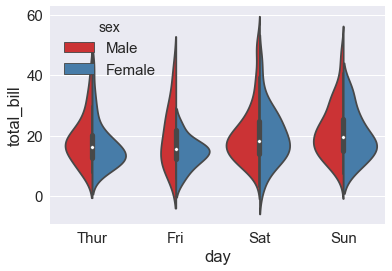

In [151]:
sns.violinplot(
    x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set1')

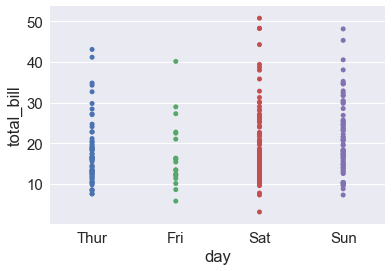

In [152]:
sns.stripplot(x="day", y="total_bill", data=tips)

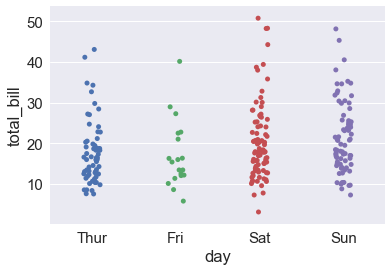

In [153]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

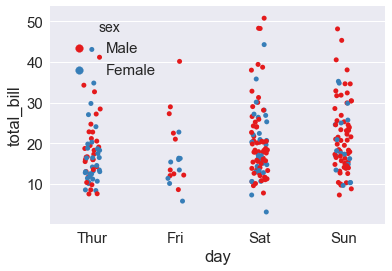

In [154]:
sns.stripplot(
    x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1')

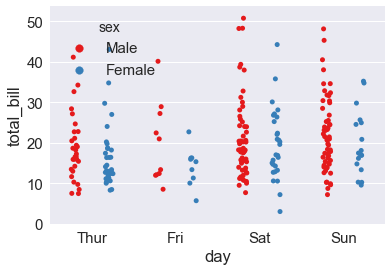

In [155]:
sns.stripplot(
    x="day",
    y="total_bill",
    data=tips,
    jitter=True,
    hue='sex',
    palette='Set1',
    dodge=True)  # раньше назывался split

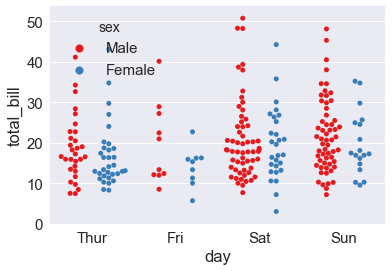

In [156]:
sns.swarmplot(
    x="day", y="total_bill", hue='sex', data=tips, palette="Set1", dodge=True)

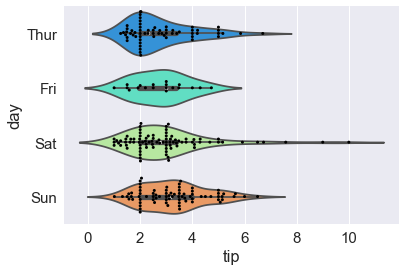

In [157]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips, color='black', size=3)

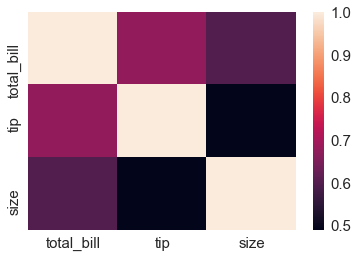

In [158]:
sns.heatmap(tips.corr())

Text(0.5,1,'lalala')

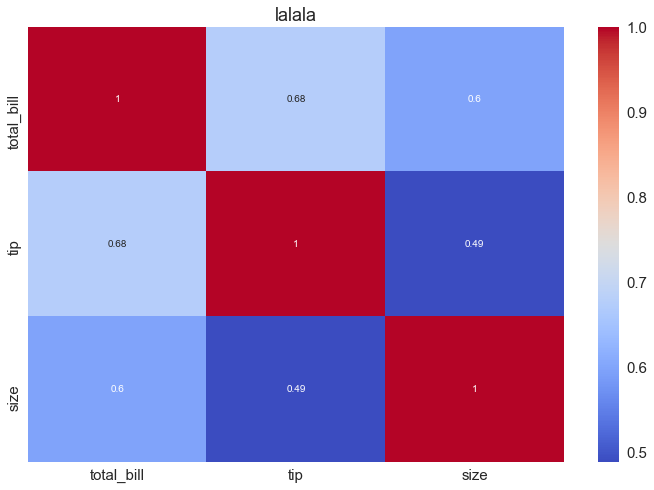

In [165]:
plt.figure(figsize=(12, 8))


sns.heatmap(tips.corr(), cmap='coolwarm', annot=True).set_title('lalala')

One trick you can use in pandas is to convert a column to a category, then use those category values for your label encoding:

In [199]:
tips["sex"] = tips["sex"].astype('category')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [201]:
tips["sex_int"] = tips["sex"].cat.codes

In [202]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_int
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [204]:
tips.corr()

,total_bill,tip,size,sex_int
total_bill,1.000000,0.675734,0.598315,-0.144877
tip,0.675734,1.000000,0.489299,-0.088862
size,0.598315,0.489299,1.000000,-0.086195
sex_int,-0.144877,-0.088862,-0.086195,1.000000


# Regression

Linear regression is a linear approach to modelling the relationship between dependent variable and one or more explanatory variables (or independent variables). 
<img src="img/one_dim_lin_reg.png" width="550">

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
%matplotlib inline

Load Boston House Prices dataset

In [29]:
boston = sm.datasets.get_rdataset("Boston", package="MASS").data

In [34]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Data Set Characteristics:  
```
    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
```

In [32]:
boston.shape

(506, 14)

In [117]:
boston.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

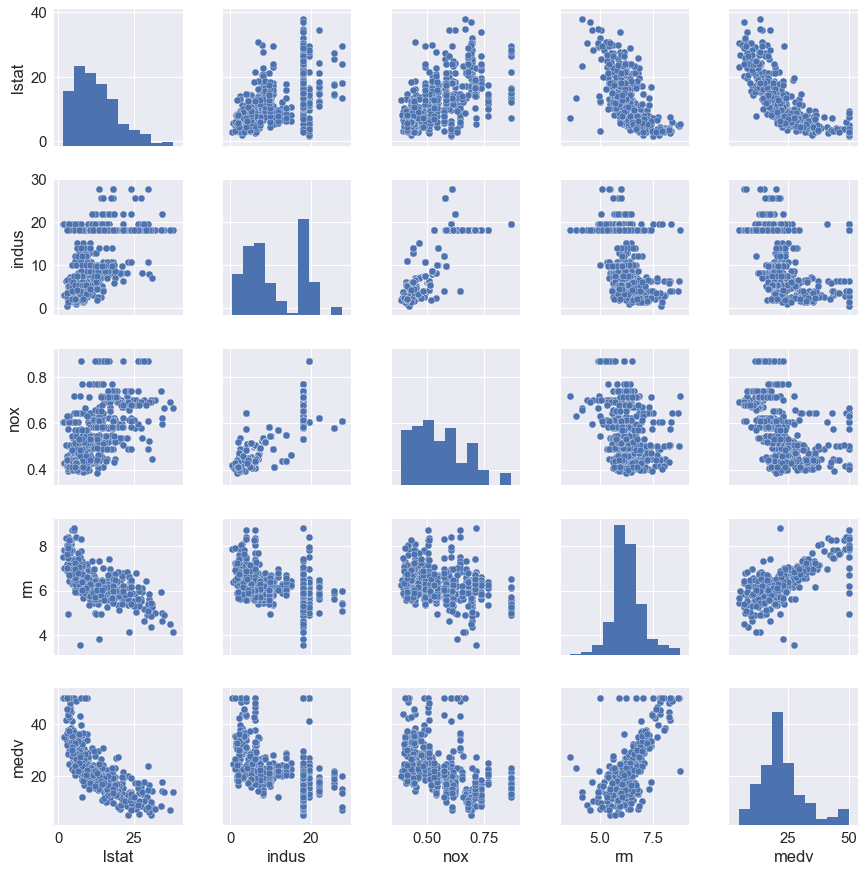

In [120]:
cols = ['lstat', 'indus', 'nox', 'rm', 'medv']

sns.pairplot(boston[cols], size=2.5)

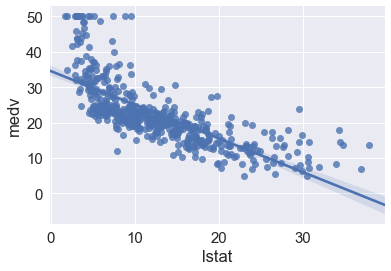

In [39]:
sns.regplot(x="lstat", y="medv", data=boston)

In [173]:
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

results = smf.ols('medv ~ lstat * rm', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Thu, 19 Jul 2018   Prob (F-statistic):          1.75e-146
Time:                        03:14:04   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.1245      3.342     -8.713      0.000     -35.692     -22.558
lstat          2.1940      0.206     10.666      0.000       1.790       2.598
rm             9.7013      0.500     19.393      0.000       8.718      10.684
lstat:rm      -0.4849      0.035    -14.018      0.000      -0.553      -0.417
==============================================================================
Omnibus:                      223.968   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2182.462
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      12.613   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression diagnostic

## Key Assumptions of Linear Regression Model

* Y and ε are normally distributed
* Lack of influential observations (outliers and leverages)
* Linearity: the mean of the Y is assumed to be a linear combination of the parameters (betas) and the predictor variables Xi
* Constant variance (a.k.a. homoscedasticity)
* Lack of multicollinearity in the predictors


This example file shows how to use a few of the statsmodels regression diagnostic tests in a real-life context. You can learn about more tests and find out more information abou the tests here on the [Regression Diagnostics page](http://www.statsmodels.org/stable/diagnostic.html).

Note that most of the tests described here only return a tuple of numbers, without any annotation. A full description of outputs is always included in the docstring and in the online statsmodels documentation. For presentation purposes, we use the zip(name,test) construct to pretty-print short descriptions in the examples below. [Source](https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html)

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

## Normality of the residuals

Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. The null hypothesis for the test is that the data is normally distributed; the alternate hypothesis is that the data does not come from a normal distribution.

In [84]:
# results.resid stores residuals

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


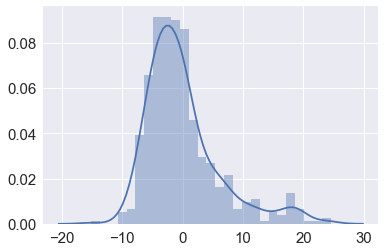

In [83]:
sns.distplot(results.resid)

In [85]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid) # test for normal distribution of residuals
zip(name, test)

[('Jarque-Bera', 291.3733815116156),
 ('Chi^2 two-tail prob.', 5.3588810599140505e-64),
 ('Skew', 1.4527390716142372),
 ('Kurtosis', 5.319111488424163)]

In [89]:
name = ['Kolmogorov-Smirnov test statistic', 'pvalue']
test = statsmodels.stats.diagnostic.kstest_normal(results.resid, dist='norm')
lzip(name, test)

[('Kolmogorov-Smirnov test statistic', 0.14316779396250956),
 ('pvalue', 5.589819232097868e-28)]

Omni test:

In [48]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 137.04343416552658),
 ('Two-tail probability', 1.743397345610579e-30)]

## Influence tests

Once created, an object of class OLSInfluence holds attributes and methods that allow users to assess the influence of each observation. For example, we can compute and extract the first few rows of DFbetas by:

In [50]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(results)
test_class.dfbetas[:5,:]

array([[-0.05971601,  0.04497659],
       [-0.02815581,  0.01506923],
       [ 0.04408318, -0.0345099 ],
       [ 0.01975657, -0.01603866],
       [ 0.06676244, -0.04947061]])

Explore other options by typing dir(influence_test)

Useful information on leverage can also be plotted:

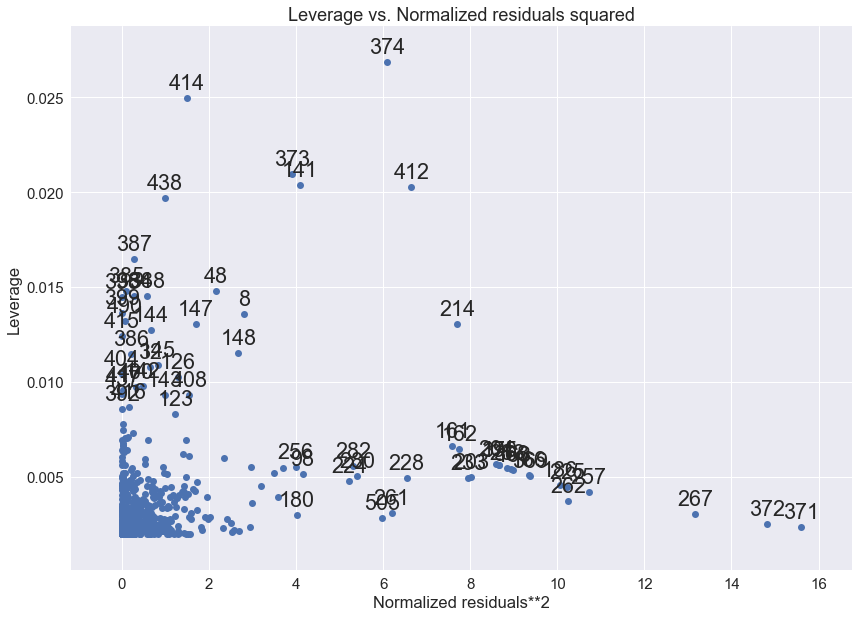

In [90]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(14,10))
fig = plot_leverage_resid2(results, ax = ax)

Other plotting options can be found on the [Graphics page](http://www.statsmodels.org/stable/graphics.html).

## Multicollinearity

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

In [97]:
boston.index

RangeIndex(start=0, stop=506, step=1)

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

`variance_inflation_factor` expects the presence of a constant in the matrix of explanatory variables.

In [113]:
X = boston.assign(const=1)
pd.Series([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

crim         1.831537
zn           2.352186
indus        3.992503
chas         1.095223
nox          4.586920
rm           2.260374
age          3.100843
dis          4.396007
rad          7.808198
tax          9.205542
ptratio      1.993016
black        1.381463
lstat        3.581585
medv         3.855684
const      645.977937
dtype: float64

One recommendation is that if VIF is greater than 5, then the explanatory
variable given by exog_idx is highly collinear with the other explanatory
variables, and the parameter estimates will have large standard errors
because of this.

## Heteroskedasticity tests

Heteroscedasticity means unequal scatter. In regression analysis, we talk about heteroscedasticity in the context of the residuals or error term. Specifically, heteroscedasticity is a systematic change in the spread of the residuals over the range of measured values. Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity).

![](https://i.stack.imgur.com/RXQv9.png)

For these test the null hypothesis is that all observations have the same error variance, i.e. errors are homoscedastic. The tests differ in which kind of heteroscedasticity is considered as alternative hypothesis. They also vary in the power of the test for different types of heteroscedasticity.

[Breush-Pagan test](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test):

In [70]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)

In [76]:
pd.DataFrame({"value": test}, index=name)

,value
Lagrange multiplier statistic,15.497474
p-value,0.000083
f-value,15.923928
f p-value,0.000076


Goldfeld-Quandt test

In [81]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 1.2197156802717934), ('p-value', 0.05815002127011859)]

## Linearity
Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

In [ ]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

# Practice

In [186]:
duncan = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/carData/Duncan.csv", index_col=0)

In [188]:
duncan.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


* What is the distribution of income, education and prestige? Draw KDE plots.
* Is there a correlation between education and income?
* Calculate z-scores for income and education (use [`apply`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html?highlight=apply#pandas.Series.apply)). What kind of specialists have a higher income and educational level than in avarage?
* Build a regression and try to explore what infuence prestige most — income or education.
* Run diagnostics. Is you regression model is correct?

In [178]:
duncan.corr()

,income,education,prestige
income,1.000000,0.724512,0.837801
education,0.724512,1.000000,0.851916
prestige,0.837801,0.851916,1.000000


## What is the distribution of income, education and prestige? Draw KDE plots.


Distribution can hardly be called "normal".

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


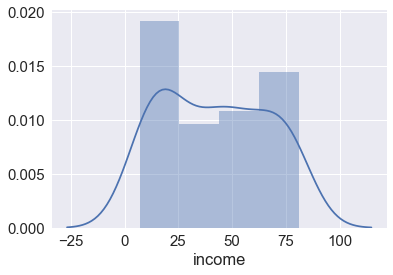

In [207]:
sns.distplot(duncan['income'])

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


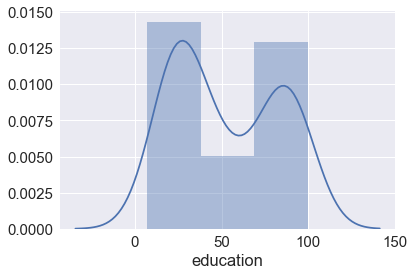

In [208]:
sns.distplot(duncan['education'])

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


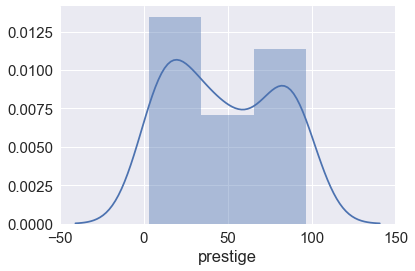

In [212]:
sns.distplot(duncan['prestige'])

In [214]:
# Is there a correlation between education and income?

duncan[["education", "income"]].corr()

,education,income
education,1.000000,0.724512
income,0.724512,1.000000


Yes, it is. Corr = 0.724512

## Calculate z-scores for income and education

"A key idea here is that the values in the middle of the normal distribution (Z scores like 0.19 or -1.2, for example), represent the expected outcome (the norm ...generally uninteresting). When the absolute value of the Z score is large (z>1.96) and the probabilities are small, you are seeing something unusual and generally very interesting."

See here the explanation what is it: https://en.wikipedia.org/wiki/Standard_score, http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm

$z=\frac{\bar{x}-x}{std(x)}$

In [228]:
for var in ["education", "income", "prestige"]:
    z = duncan[var].apply(lambda x: (duncan[var].mean() - x) / duncan[var].std())
    
    # or, better decision not to use apply and calculate z-scores directly
    z = (duncan[var].mean() - duncan[var]) / duncan[var].std()
    
    duncan[var + "_z"] = z # add z-scores to our dataframe as new columns

duncan.head()

,type,income,education,prestige,education_z,income_z,prestige_z
accountant,prof,62,86,82,-1.123774,-0.823952,-1.088884
pilot,prof,72,76,83,-0.787762,-1.233200,-1.120620
architect,prof,75,92,90,-1.325381,-1.355974,-1.342769
author,prof,55,90,76,-1.258179,-0.537479,-0.898471
chemist,prof,64,86,90,-1.123774,-0.905802,-1.342769


What kind of specialists have a higher income and educational level than in avarage?

Answer: There is no such professions (absolute z-scores are always > 1.96)

## Build a regression and try to explore what infuence prestige most — income or education.

To compare the variables they need to be measured on the same scale, z-scale, for example.

In [231]:
results = smf.ols('prestige_z ~ education_z + income_z', data=duncan).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             prestige_z   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           8.65e-17
Time:                        20:40:52   Log-Likelihood:                -23.718
No. Observations:                  45   AIC:                             53.44
Df Residuals:                      42   BIC:                             58.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.812e-17      0.063   7.61e-16      1.000      -0.128       0.128
education_z     0.5155      0.093      5.555      0.000       0.328       0.703
income_z        0.4643      0.093      5.003      0.000       0.277       0.652
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                          -0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we see, both education and income have an infuence on prestige (P>|t| < 0.05), but `education` influence most (coef 0.5155 > 0.4643)

## Run diagnostics. Is you regression model is correct?

### Normality of the residuals

In [235]:
name = ['Kolmogorov-Smirnov test statistic', 'p-value']
test = statsmodels.stats.diagnostic.kstest_normal(results.resid, dist='norm')
lzip(name, test)

[('Kolmogorov-Smirnov test statistic', 0.08017502586849445), ('p-value', 0.2)]

p-value > 0.05, so residuals are distributed normally.

### Influence tests

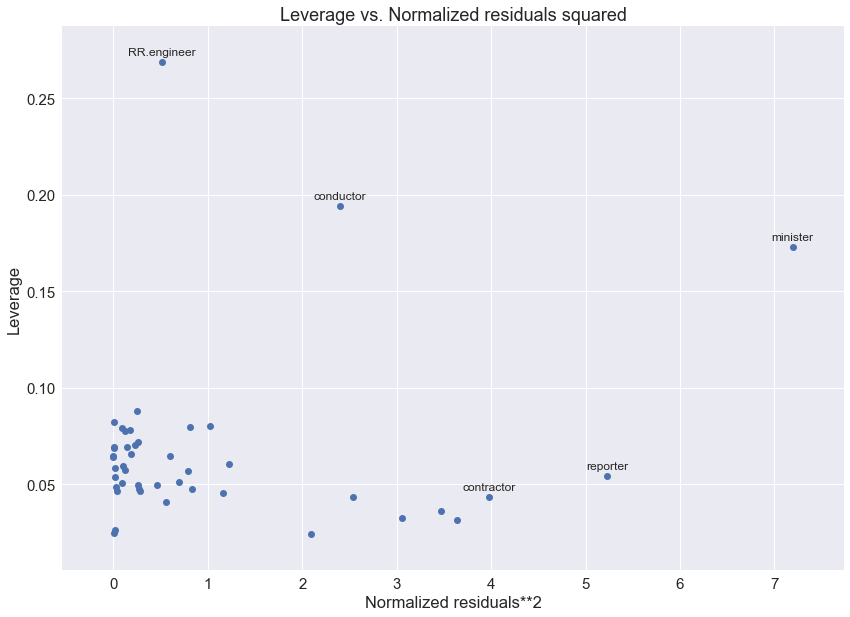

In [236]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(14,10))
fig = plot_leverage_resid2(results, ax = ax)

We have some outliers — minister, engineer, reporter. Why it is so?

### Multicollinearity

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [243]:
X = duncan[["education", "income"]].assign(const=1) # can be applied only to continious variables
# prestige is dependent variable so we don't check it for multicollinearity

pd.Series([vif(X.values, i) 
            for i in range(X.shape[1])],
          index=X.columns)

education    2.104900
income       2.104900
const        4.594765
dtype: float64

Everything is ok here, VIF < 5

### Heteroskedasticity



In [244]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)

In [245]:
pd.DataFrame({"value": test}, index=name)

,value
Lagrange multiplier statistic,0.575219
p-value,0.750054
f-value,0.271911
f p-value,0.763253


There is not such thing as heteroskedasticity in our data (p-value > 0.05)

### Linearity

In [246]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', 1.5005709652202146), ('p value', 0.14112883698936807)]

Yes, `prestige` is a linear combination of the parameters and the predictor variables (p value > 0.05).